<a href="https://colab.research.google.com/github/jx-dohwan/Initial_public_offering_price_prediction/blob/main/%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 신경망 학습

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from scipy.stats import pointbiserialr

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/인공지능/경영빅데이터/data/IPOv3_resampled_data.csv')
df = df.drop(['최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)','최근 3개월 공모주 수', '희망공모가_하한',  '희망공모가_상한','일반청약자(비율)', 'ROE'], axis=1)
df.info()
X = df.drop('종속변수', axis=1)
y = df['종속변수']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   상장 시기(상장월)         832 non-null    int64  
 1   최근 "따" 비율          832 non-null    float64
 2   공모가                832 non-null    int64  
 3   밴드수익률(공모가/공모가_상한)  832 non-null    float64
 4   기관경쟁률              832 non-null    float64
 5   청약경쟁률              832 non-null    float64
 6   의무보유확약             832 non-null    float64
 7   대표주간사              832 non-null    int64  
 8   IPO 주간사 순위         832 non-null    int64  
 9   총 공모주식 수           832 non-null    int64  
 10  구주매출(비율)           832 non-null    float64
 11  매출액(백만원)           832 non-null    int64  
 12  순이익(백만원)           832 non-null    int64  
 13  자본금(백만원)           832 non-null    int64  
 14  전문투자자(비율)          832 non-null    float64
 15  우리사주조합(비율)         832 non-null    float64
 16  공모후 상장주식수(주식수)     832 non

#### 신경망 3계층

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=verbose, n_jobs=n_jobs)

    grid_model.fit(train, y)

    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    results = pd.DataFrame(params)
    results['score'] = score

    results = results.sort_values('score', ascending=False)

    return results

# MLPClassifier 모델 정의
mlp = MLPClassifier()

# 하이퍼파라미터 그리드
param_grid = {
    'hidden_layer_sizes': [(1,), (3, ), (5,), (7, ), (9,), (11,),(13,),(15,)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300, 400, 500]
}

from sklearn.preprocessing import StandardScaler
# StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터 준비 (X_train과 y_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 그리드서치 실행
my_GridSearch(mlp, X_train, y_train, param_grid)



Fitting 5 folds for each of 120 candidates, totalling 600 fits


,hidden_layer_sizes,learning_rate_init,max_iter,score
117,"(15,)",0.100,300,0.884211
81,"(11,)",0.010,200,0.875188
96,"(13,)",0.010,200,0.873684
55,"(7,)",0.100,100,0.873684
88,"(11,)",0.100,400,0.873684
...,...,...,...,...
30,"(5,)",0.001,100,0.745865
2,"(1,)",0.001,300,0.736842
1,"(1,)",0.001,200,0.720301
15,"(3,)",0.001,100,0.706767


In [6]:
mlp = MLPClassifier(max_iter=300, learning_rate_init=0.1, hidden_layer_sizes=(15,))

mlp.fit(X_train, y_train)


print("Logistic Regression Score: ", mlp.score(X_test, y_test))

pred = mlp.predict(X_test)
print("Logistic Regression: ")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Logistic Regression Score:  0.8682634730538922
Logistic Regression: 
[[61 16]
 [ 6 84]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.85        77
           1       0.84      0.93      0.88        90

    accuracy                           0.87       167
   macro avg       0.88      0.86      0.87       167
weighted avg       0.87      0.87      0.87       167



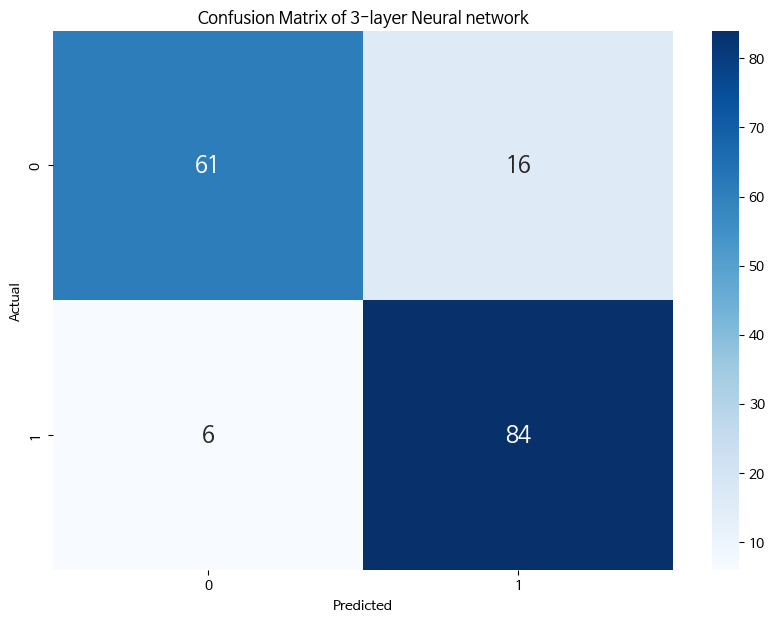

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of 3-layer Neural network')
plt.show()

#### 신경망 4계층

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=verbose, n_jobs=n_jobs)

    grid_model.fit(train, y)

    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    results = pd.DataFrame(params)
    results['score'] = score

    results = results.sort_values('score', ascending=False)

    return results

# MLPClassifier 모델 정의
mlp = MLPClassifier()

# 하이퍼파라미터 그리드
param_grid = {
    'hidden_layer_sizes': [(1,1), (3,3 ), (5,5), (7,7 ), (9,9), (11,11),(13,13),(15,15)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300, 400, 500]
}

from sklearn.preprocessing import StandardScaler
# StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터 준비 (X_train과 y_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 그리드서치 실행
my_GridSearch(mlp, X_train, y_train, param_grid)



Fitting 5 folds for each of 120 candidates, totalling 600 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,learning_rate_init,max_iter,score
107,"(15, 15)",0.001,300,0.887218
112,"(15, 15)",0.010,300,0.887218
81,"(11, 11)",0.010,200,0.887218
96,"(13, 13)",0.010,200,0.885714
109,"(15, 15)",0.001,500,0.879699
...,...,...,...,...
8,"(1, 1)",0.010,400,0.697744
9,"(1, 1)",0.010,500,0.640602
2,"(1, 1)",0.001,300,0.603008
1,"(1, 1)",0.001,200,0.550376


In [9]:
mlp = MLPClassifier(max_iter=300, learning_rate_init=0.001, hidden_layer_sizes=(15,15))

mlp.fit(X_train, y_train)


print("Logistic Regression Score: ", mlp.score(X_test, y_test))

pred = mlp.predict(X_test)
print("Logistic Regression: ")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Logistic Regression Score:  0.8622754491017964
Logistic Regression: 
[[63 14]
 [ 9 81]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        77
           1       0.85      0.90      0.88        90

    accuracy                           0.86       167
   macro avg       0.86      0.86      0.86       167
weighted avg       0.86      0.86      0.86       167



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


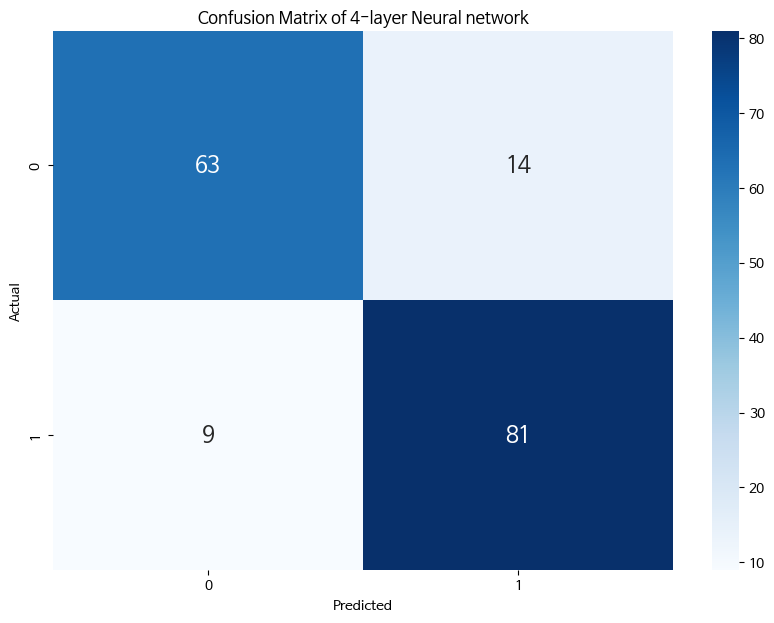

In [10]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of 4-layer Neural network')
plt.show()